# 로지스틱 회귀분석

In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
# 데이터 수집 및 탐색

In [9]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [11]:
raw = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df = raw.copy()

In [12]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
df['diagnosis'] =cancer.target

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [14]:
df.shape

(569, 31)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.head()
# 단위, 자리수(0.1~ 1,000 단위)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 평균 0 , 분산(표준편차) 1 >> 정규분포를 띄게 만들어

In [18]:
cancer_scaled = scaler.fit_transform(cancer.data)

In [19]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [20]:
cancer_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

분석 모델 구축 : 로지스틱 회귀 이용 >> 이진 분류(1,0 분류)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
# 독립변수, 종속변수 구분(x, y 설정)
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [23]:
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [24]:
y = df['diagnosis']

In [25]:
y =df['diagnosis']
x = cancer_scaled

In [26]:
# 훈련용 / 평가용 데이터 분할 train data / test data

x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
# 모델 생성
lr = LogisticRegression()

In [28]:
# 모델 훈련 (훈련용 데이터 >> 모델 구축)
lr.fit(x_train, y_train)

LogisticRegression()

In [29]:
# 평가 데이터 (x_test)에 대한 예측 수행
# >> 예측 결과 y_pred
# >> 실제값인 y_test 비교(성능 평가)

y_pred = lr.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [31]:
# 혼동행렬(오차행렬)

confusion_matrix(y_test, y_pred)

array([[ 62,   1],
       [  2, 106]])

In [32]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [33]:
print('정확도 :{0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, f1:{3:.3f}'.format(acc, precision, recall, f1))

정확도 :0.982, 정밀도 : 0.991, 재현율 : 0.981, f1:0.986


In [34]:
print('ROC_AUC:{0:.3f}'.format(roc_auc))

ROC_AUC:0.983


의사결정나무(Decision Tree)

In [36]:
!pip install pandas==0.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 46.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


#텍스트 준비 및 탐색

In [37]:
import numpy as np
import pandas as pd

pd.__version__

'2.0.3'

In [38]:
# feature 속성 정보 파일 읽어오기

path = '/content/drive/MyDrive/멀티캠퍼스/UCI_HAR_Dataset'

In [41]:
pd.read_csv(path+'/features.txt', sep = '\s+', header=None,
names=['index','feature_name'])

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [42]:
raw = pd.read_csv(path+'/features.txt', sep = '\s+', header=None, names=['index','feature_name'])

df=raw.copy()
df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [43]:
df.shape

(561, 2)

In [44]:
df.iloc[:, 1].values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [45]:
# index 제거, feature_name만 리스트로 저장
feature_name = df.iloc[:, 1].values.tolist()

In [46]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [52]:
x_train = pd.read_csv(path+'/train/X_train.txt', sep='\s+', header=None)

In [55]:
x_train.columns = feature_name

In [56]:
x_train[:2]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [57]:
x_test = pd.read_csv(path+'/test/X_test.txt', sep='\s+', header=None)
x_test.columns = feature_name

In [58]:
y_train = pd.read_csv(path+'/train/Y_train.txt', sep='\s+', header=None)
y_train.columns = ['action']

In [59]:
y_test = pd.read_csv(path+'/test/Y_test.txt', sep='\s+', header=None)
y_test.columns = ['action']

In [60]:
x_train[:3]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [61]:
x_test[:3]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346


In [62]:
y_train[:3]

,action
0,5
1,5
2,5


In [63]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [65]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [67]:
label_name = pd.read_csv(path+'/activity_labels.txt', sep='\s+', header=None, names=['index', 'label'])

In [68]:
# index 제거, label_name만 리스트로 저장

label_name = label_name.iloc[:,1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

모델 구축 : 의사결정나무

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
# 결정트리 분류 분석 : 모델 생성

dt = DecisionTreeClassifier(random_state=42)

In [71]:
# 모델 훈련
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# 평가 데이터(x_test) 예측 수행 >> 예측 결과 y_pred 구하기

y_pred = dt.predict(x_test)

In [75]:
# 결과분석
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print('의사결정나무 예측 정확도 : {0:.3f}'.format(acc))

의사결정나무 예측 정확도 : 0.862


# 성능 개선 : 최적의 파라미터 찾기

In [76]:
# 모델의 파라미터(매개변수) 기본값 (default)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
params = {
    'max_depth' : [6,8,10,12,16,18,20,22,24]
}

grid_cv = \
GridSearchCV(dt, param_grid= params, scoring='accuracy', cv = 5, return_train_score=True)
# cv : cross validation

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 18, 20, 22, 24]},
             return_train_score=True, scoring='accuracy')

In [79]:
grid_cv.cv_results_

{'mean_fit_time': array([3.32904015, 3.52763925, 3.8062777 , 3.66461596, 4.28264933,
        4.18741226, 5.91077833, 5.83023996, 4.53764954]),
 'std_fit_time': array([0.69576832, 1.06021345, 1.33209069, 0.28549874, 0.73073353,
        0.57397599, 2.05934005, 1.47708945, 0.87229507]),
 'mean_score_time': array([0.01720014, 0.01293597, 0.01370335, 0.01148281, 0.01125722,
        0.01187682, 0.02706361, 0.01776519, 0.01341448]),
 'std_score_time': array([0.00469262, 0.00326005, 0.00296165, 0.00257967, 0.00253969,
        0.00271948, 0.01775759, 0.00149231, 0.00362179]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 18, 20, 22, 24],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 18},
  {'max_depth': 20},
  {'max_depth': 22},
  {'max_depth': 24}]

In [80]:
df_cv = pd.DataFrame(grid_cv.cv_results_)
print(df_cv.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.329040      0.695768         0.017200        0.004693   
1       3.527639      1.060213         0.012936        0.003260   
2       3.806278      1.332091         0.013703        0.002962   
3       3.664616      0.285499         0.011483        0.002580   
4       4.282649      0.730734         0.011257        0.002540   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               6   {'max_depth': 6}           0.806934           0.869477   
1               8   {'max_depth': 8}           0.805574           0.829368   
2              10  {'max_depth': 10}           0.786540           0.805574   
3              12  {'max_depth': 12}           0.789259           0.818491   
4              16  {'max_depth': 16}           0.796737           0.819850   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.810204           0.863265  ...   

In [82]:
df_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [84]:
df_cv[['param_max_depth','mean_test_score','mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.846303,0.944879
1,8,0.847941,0.982692
2,10,0.840464,0.993403
3,12,0.843319,0.997178
4,16,0.845358,0.999660
5,18,0.846038,0.999898
6,20,0.845086,0.999966
7,22,0.847397,1.000000
8,24,0.847397,1.000000


In [85]:
print('최고 평균 정확도: {0:.3f}'.format(grid_cv.best_score_))

최고 평균 정확도: 0.848


In [91]:
print('최적의 하이퍼 파라미터(hyper-parameter): {0}'.format(grid_cv.best_params_))

최적의 하이퍼 파라미터(hyper-parameter): {'max_depth': 8}


In [92]:
# 한 번 더 ~
params = {
    'max_depth' : [6,8,10],
    'min_samples_split' :[8,12,16]
}

grid_cv = \
GridSearchCV(dt, param_grid= params, scoring='accuracy', cv = 5, return_train_score=True)
# cv : cross validation

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [8, 12, 16]},
             return_train_score=True, scoring='accuracy')

In [93]:
grid_cv.cv_results_

{'mean_fit_time': array([2.6525784 , 2.70262899, 2.15678668, 3.24006429, 3.3654417 ,
        3.70220923, 5.04815378, 4.03101392, 3.84740357]),
 'std_fit_time': array([0.54658138, 0.56326329, 0.29535891, 0.30677639, 1.27012017,
        0.82079008, 1.69083819, 0.38756261, 0.79866278]),
 'mean_score_time': array([0.01993032, 0.01398597, 0.01024456, 0.0172401 , 0.01256094,
        0.0196012 , 0.01750784, 0.01506534, 0.01423106]),
 'std_score_time': array([0.01333397, 0.00325836, 0.00053072, 0.00045508, 0.00322729,
        0.00930253, 0.00856602, 0.00265927, 0.00278526]),
 'param_max_depth': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[8, 12, 16, 8, 12, 16, 8, 12, 16],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [94]:
df_cv = pd.DataFrame(grid_cv.cv_results_)
print(df_cv.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.652578      0.546581         0.019930        0.013334   
1       2.702629      0.563263         0.013986        0.003258   
2       2.156787      0.295359         0.010245        0.000531   
3       3.240064      0.306776         0.017240        0.000455   
4       3.365442      1.270120         0.012561        0.003227   

  param_max_depth param_min_samples_split  \
0               6                       8   
1               6                      12   
2               6                      16   
3               8                       8   
4               8                      12   

                                      params  split0_test_score  \
0   {'max_depth': 6, 'min_samples_split': 8}           0.806934   
1  {'max_depth': 6, 'min_samples_split': 12}           0.806934   
2  {'max_depth': 6, 'min_samples_split': 16}           0.806934   
3   {'max_depth': 8, 'min_samples_split': 8}           0.8

In [95]:
df_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [99]:
selected_features = ['param_max_depth',  'param_min_samples_split', 'mean_train_score', 'mean_train_score']
df_cv[selected_features]

,param_max_depth,param_min_samples_split,mean_train_score,mean_train_score
0,6,8,0.944675,0.944675
1,6,12,0.944675,0.944675
2,6,16,0.944233,0.944233
3,8,8,0.981468,0.981468
4,8,12,0.980992,0.980992
5,8,16,0.979836,0.979836
6,10,8,0.990717,0.990717
7,10,12,0.989221,0.989221
8,10,16,0.987384,0.987384


In [97]:
print('최고 평균 정확도: {0:.3f}'.format(grid_cv.best_score_))

최고 평균 정확도: 0.856


In [100]:
print('최적의 하이퍼 파라미터(hyper-parameter): {0}'.format(grid_cv.best_params_))

최적의 하이퍼 파라미터(hyper-parameter): {'max_depth': 8, 'min_samples_split': 12}


In [101]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=12, random_state=42)

In [102]:
best_dt = grid_cv.best_estimator_

In [103]:
best_pred = best_dt.predict(x_test)

In [105]:
best_acc = accuracy_score(y_test, best_pred)
best_acc

0.8717339667458432

# 중요 속성(Important Feature) 확인

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
best_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00217713,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00670169, 0.        , 0.        ,
       0.        , 0.00403165, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0012275 ,
       0.00628252, 0.        , 0.25304002, 0.00207442, 0.00622909,
       0.        , 0.        , 0.01641304, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00474523, 0.        , 0.        ,
       0.        , 0.00302079, 0.        , 0.        , 0.10142

In [110]:
feature_importance = best_dt.feature_importances_

In [111]:
x_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [112]:
feature_importance = pd.Series(feature_importance, index=x_train.columns)

In [113]:
feature_importance

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.000000
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001289
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000988
angle(Y,gravityMean)                    0.138828
angle(Z,gravityMean)                    0.000000
Length: 561, dtype: float64

In [114]:
feature_importance_top10 = feature_importance.sort_values(ascending=False)[:10]

In [121]:
feature_importance_TOP_10= pd.DataFrame(feature_importance_top10, columns=['importance'])

In [122]:
feature_importance_TOP_10

,importance
tGravityAcc-min()-X,0.253040
"fBodyAccJerk-bandsEnergy()-1,16",0.212320
"angle(Y,gravityMean)",0.138828
fBodyAccMag-energy(),0.115335
"tGravityAcc-arCoeff()-Z,2",0.101422
fBodyGyro-maxInds-X,0.023941
"tBodyGyro-correlation()-Y,Z",0.016493
tGravityAcc-energy()-Y,0.016413
tBodyAccMag-arCoeff()1,0.012596
fBodyAcc-max()-Y,0.008814


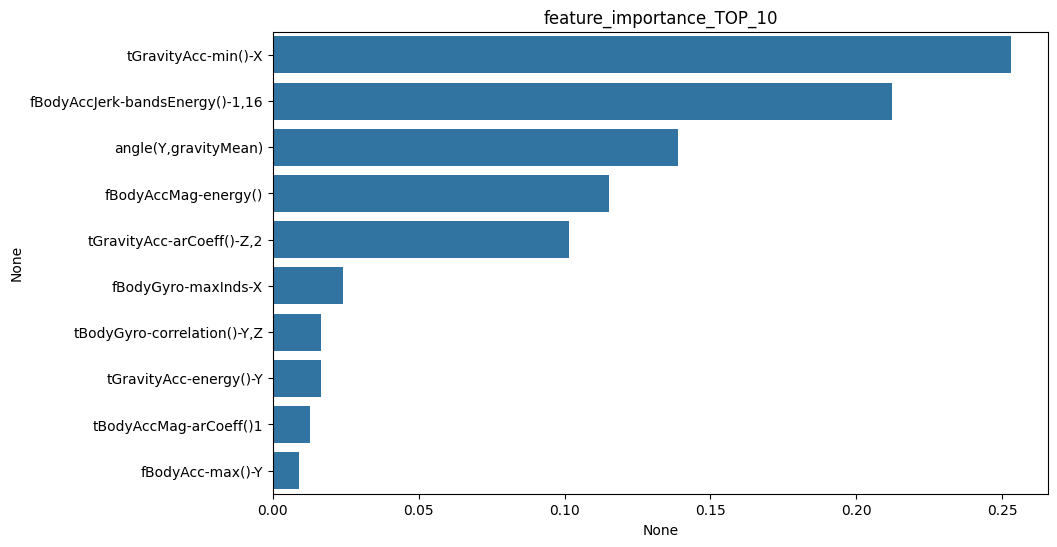

In [138]:
plt.figure(figsize=(10,6))
plt.title('feature_importance_TOP_10')
sns.barplot(x=feature_importance_top10, y=feature_importance_top10.index)
plt.show()

In [127]:
!pip install graphviz

In [128]:
from sklearn.tree import export_graphviz

In [130]:
export_graphviz(best_dt, out_file='best_tree.dot', class_names=label_name,
                feature_names=feature_name, filled = True)

# export_graphviz() 호출 >> 결과로 out_file로 지정 tree.dot 파일 생성

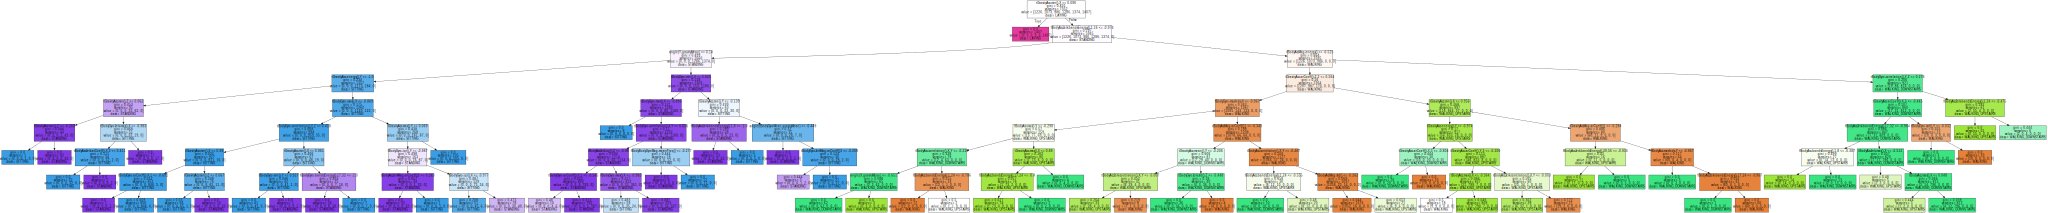

In [136]:
import graphviz
with open('best_tree.dot') as file:
    dot_tree = file.read()

graphviz.Source(dot_tree)